
**Explolatory Data Analysis For Financial inclusion in Africa Dataset**
**Understand The Problem Statement**
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this Dataset is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Data source available in the the zindi platform, Zindi Africa

**Type of the Problem**
It is a classification problem where we have to predict whether individuals are most likely to have or use a bank account or not.In a classification problem, we have to predict discrete values based on a given set of independent variable.

**Hypothesis Generation**
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the chance for a person to have a bank account

People who have mobile phone have lower chance to use bank account because of mobile money services.
People who are employed have a higher chance of having a bank account than People who are unemployed.
people with low education have low chance to have bank account
people in rural areas have low chance to have bank account
people who have age below 18 have low chance to have bank account
female have less chance to have bank account

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
# from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams is used to set the default size of the labels on the axes in Matplotlib plots.

%: This indicates an IPython magic command.

matplotlib: This specifies the library for which the inline behavior is being set.

inline: This argument tells IPython to display the plots within the notebook itself, as opposed to opening them in a new window.

In [3]:
train = pd.read_csv('F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\financial-inclusion-in-africa\\SampleSubmission.csv')
variables = pd.read_csv('F:\\DATA SCIENCE SKILLS TECHNOLOGY\\FIELD PPT 2024- AI, ML\\financial-inclusion-in-africa\\VariableDefinitions.csv')

In [4]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output show the number of rows and columns for dataset (train and test)

# **Explolatory Data Analysis**
This is the process of finding some insights from you dataset before create predictive models.

In [5]:
#show list of columns in train data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [6]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [7]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


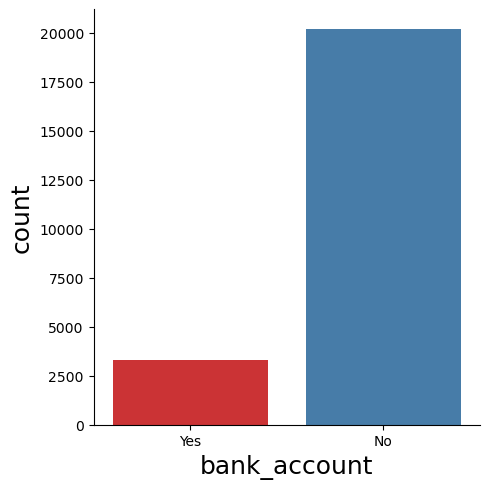

In [8]:
# Explore Target distribution
sns.catplot(x="bank_account", kind="count",
            data=train, palette="Set1")


The data shows that we have large number of no class than yes class in our target variable

In [9]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [10]:
#show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The outshow shows the list of variables , sizes and data types in each variables. This will help you to know what feature engineering you can apply.

In [11]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# **A.Univariate Analysis**
In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

In [12]:
# Frequency table of a variable will give us the count of each category in that Target variable.
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

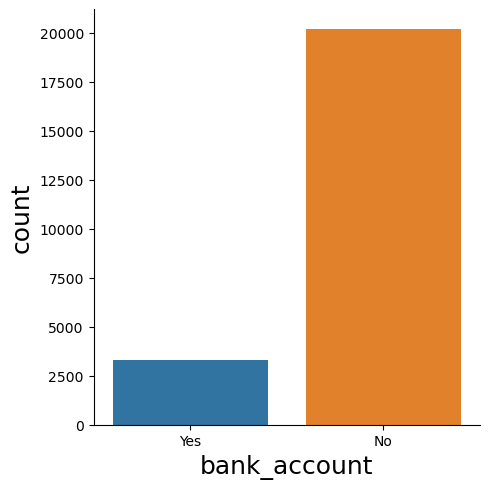

In [13]:
# Explore Target distribution

sns.catplot(x="bank_account", kind="count", data= train)


The data shows that we have large number of no class than yes class in our target variable

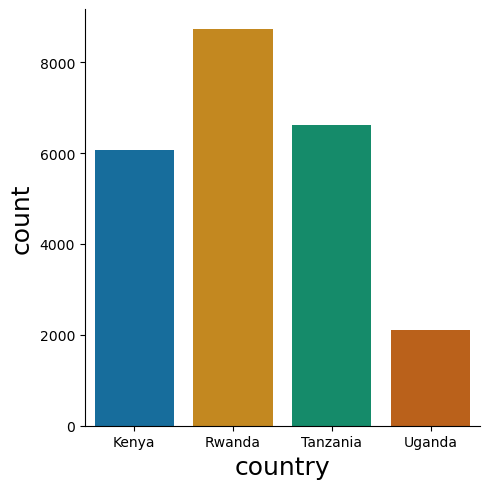

In [14]:
# Explore Country distribution

sns.catplot(x="country", kind="count",
            data=train, palette="colorblind")


Most of the data where collected in Rwanda and less data collected in Uganda

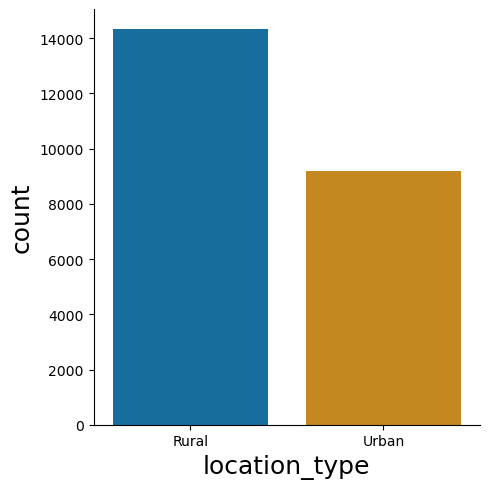

In [15]:
# Explore Location distribution
sns.catplot(x="location_type", kind="count", data=train, palette="colorblind")


Most people live in rural area than urban area

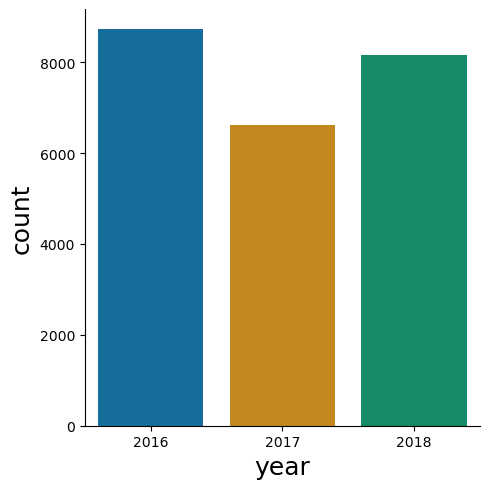

In [16]:
# Explore year distribution
sns.catplot(x="year", kind="count", data=train, palette="colorblind")

Most of the data were collected in 2016

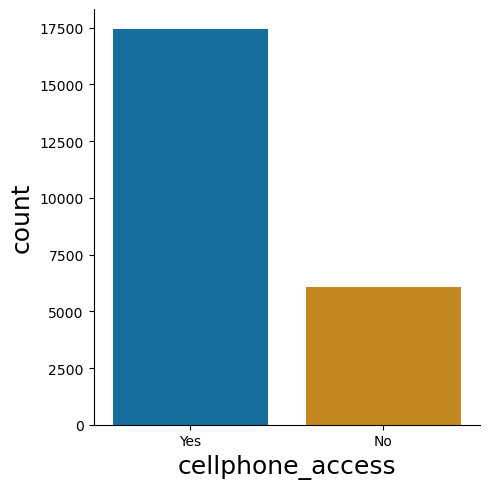

In [17]:
# Explore cellphone_access distribution
sns.catplot(x="cellphone_access", kind="count", data=train, palette="colorblind")


Most of the particiapants have access to the cellphone

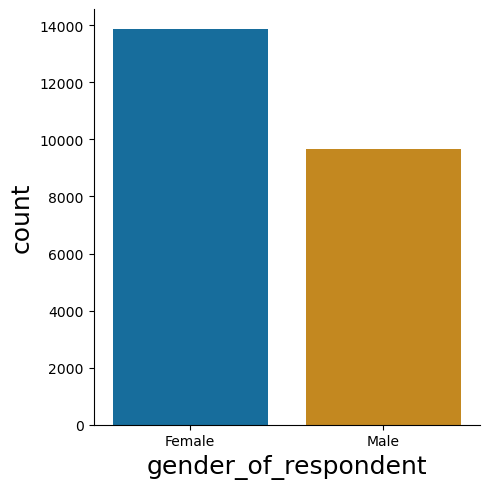

In [18]:
# Explore gender_of_respondent distribution
sns.catplot(x="gender_of_respondent", kind="count", data=train, palette="colorblind")


We have more Females than Males

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

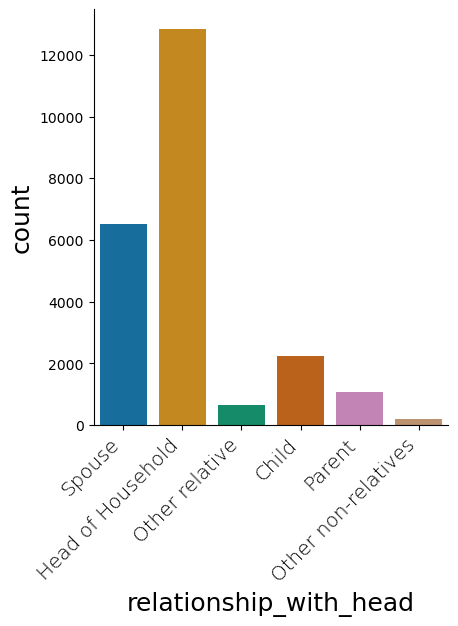

In [19]:
# Explore relationship_with_head distribution

sns.catplot(x="relationship_with_head", kind="count", data=train, palette="colorblind");

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


We have more head of Household particants and few other non-relatives

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

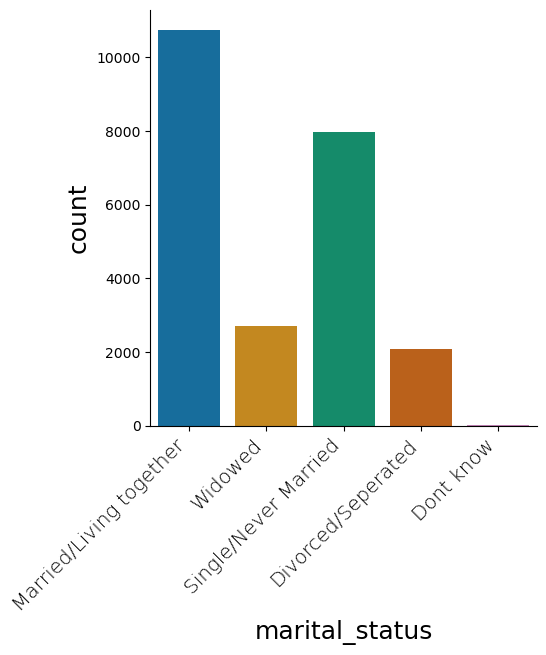

In [20]:
# Explore marital_status distribution

sns.catplot(x="marital_status", kind="count", data=train, palette="colorblind");

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


Most of the participants are maried/living together

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

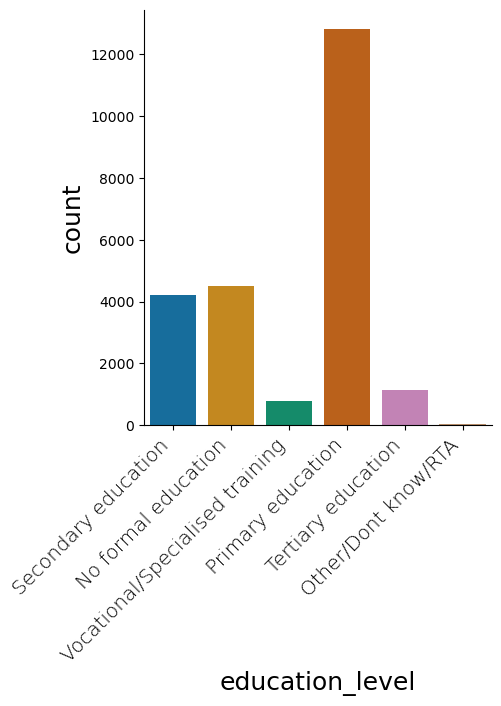

In [21]:
# Explore education_level distribution

sns.catplot(x="education_level", kind="count", data=train, palette="colorblind");

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


Most of the participants have primary education level

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

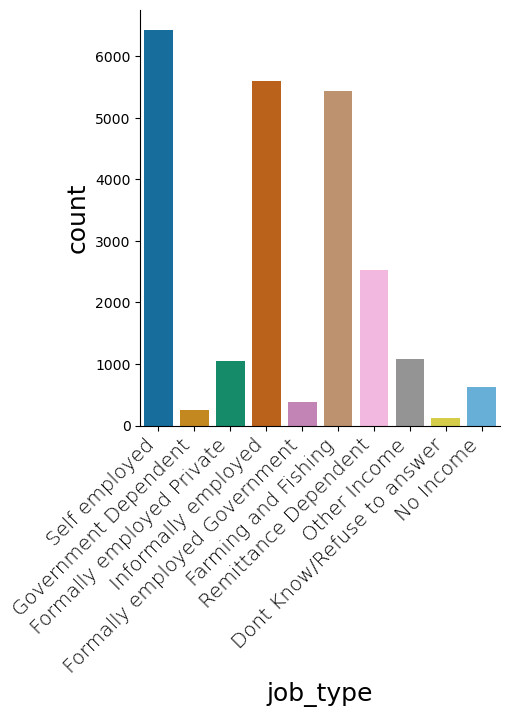

In [22]:
# Explore job_type distribution

sns.catplot(x="job_type", kind="count", data=train, palette="colorblind");

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Most of the participants are self employed

Text(0.5, 0, 'Household  size')

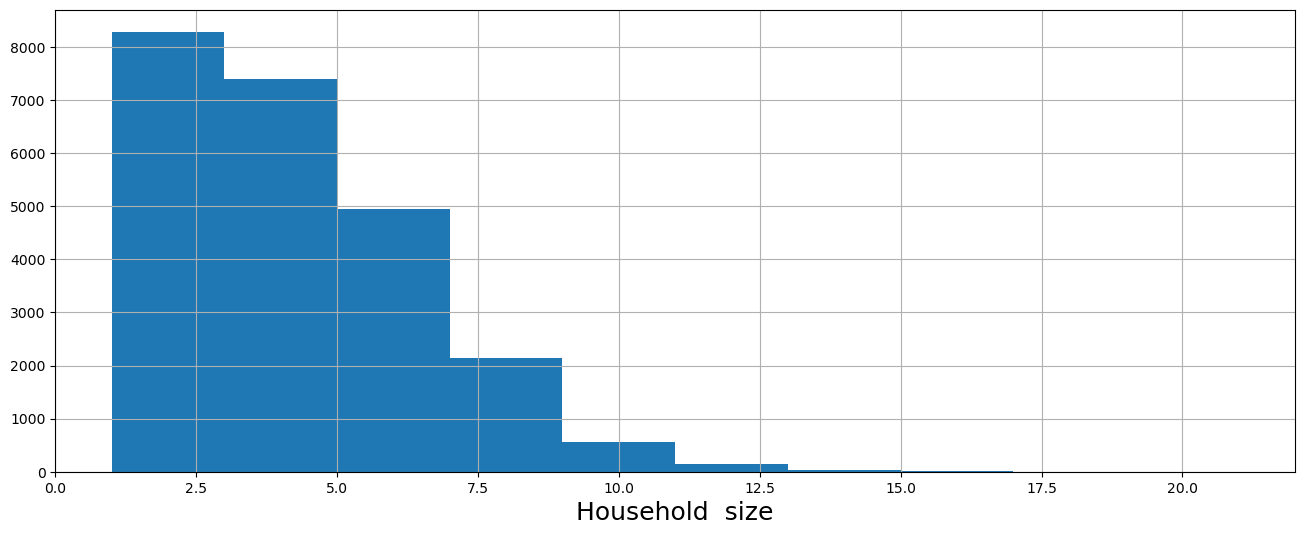

In [23]:
# Explore household_size distribution

plt.figure(figsize=(16, 6))
train.household_size.hist()
plt.xlabel('Household  size')

In [24]:
# Get the unique values of household_size
unique_household_sizes = train.household_size.unique()
print("Unique household sizes:", unique_household_sizes)

Unique household sizes: [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]


In [25]:
# Get the count of each unique household size
household_size_counts = train.household_size.value_counts()

# Find the most common household size and its count
most_common_household_size = household_size_counts.idxmax()
print("Most common number of people in household:", most_common_household_size)

most_common_household_size_count = household_size_counts.max()
print("Count of the most common household size:", most_common_household_size_count)


Most common number of people in household: 2
Count of the most common household size: 5229



Household_size is not normally distributed and the most common number of people living in the house is 2

Text(0.5, 0, 'Age of Respondent')

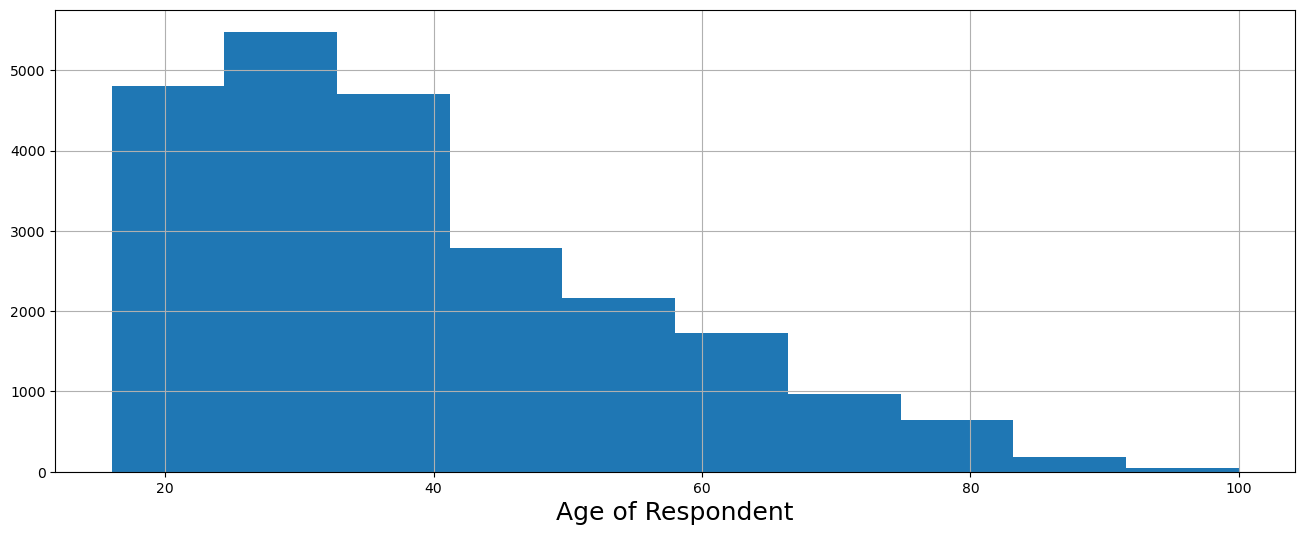

In [26]:
# Explore age_of_respondent distribution
plt.figure(figsize=(16, 6))
train.age_of_respondent.hist()
plt.xlabel('Age of Respondent')

most of the participant's age is between 20's and 40

# **B.Bivariate Analysis**
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

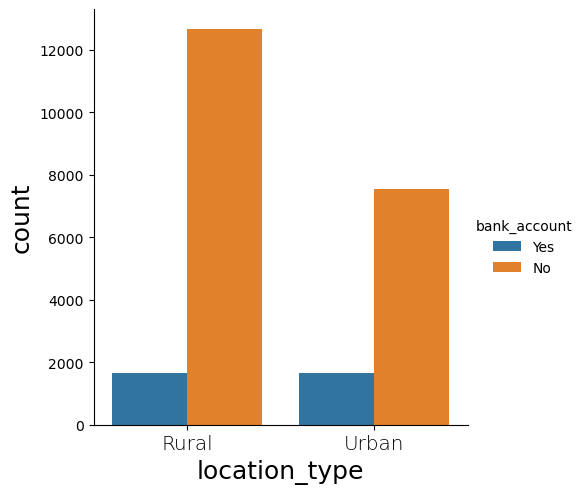

In [27]:
plt.figure(figsize=(16, 6))
sns.catplot(x='location_type', hue='bank_account', 
            kind='count', data=train)
plt.xticks(
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x600 with 0 Axes>

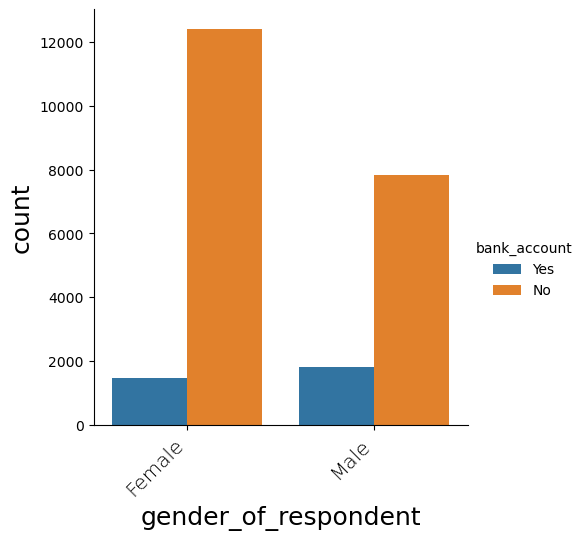

In [28]:
plt.figure(figsize=(16, 6))
sns.catplot(x='gender_of_respondent', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

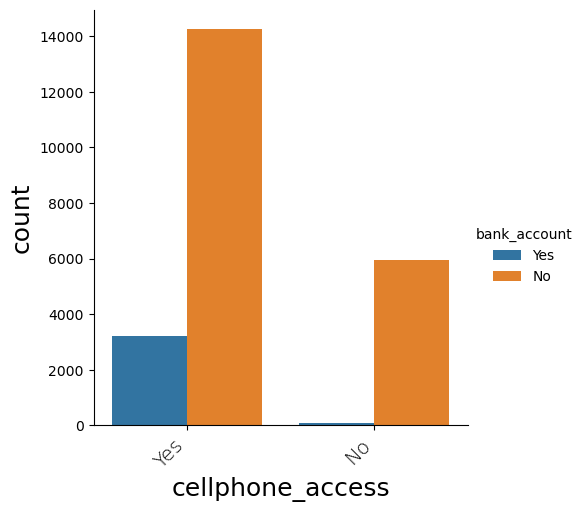

In [29]:
plt.figure(figsize=(16, 6))
sns.catplot(x='cellphone_access', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

<Figure size 1600x600 with 0 Axes>

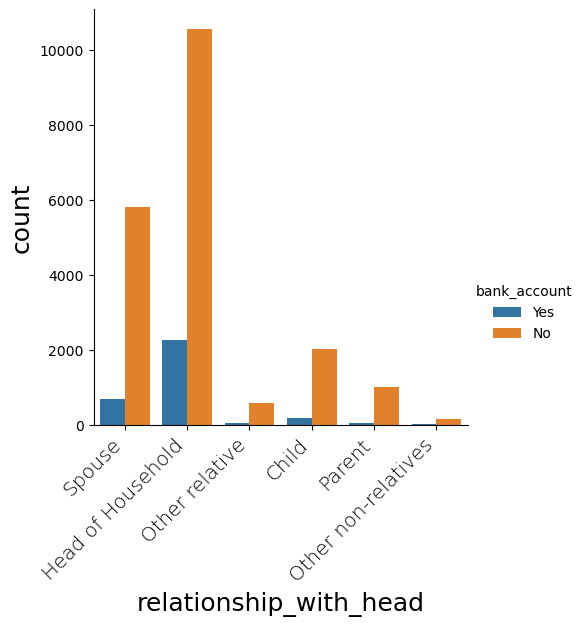

In [30]:
plt.figure(figsize=(16, 6))
sns.catplot(x='relationship_with_head', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

<Figure size 1600x600 with 0 Axes>

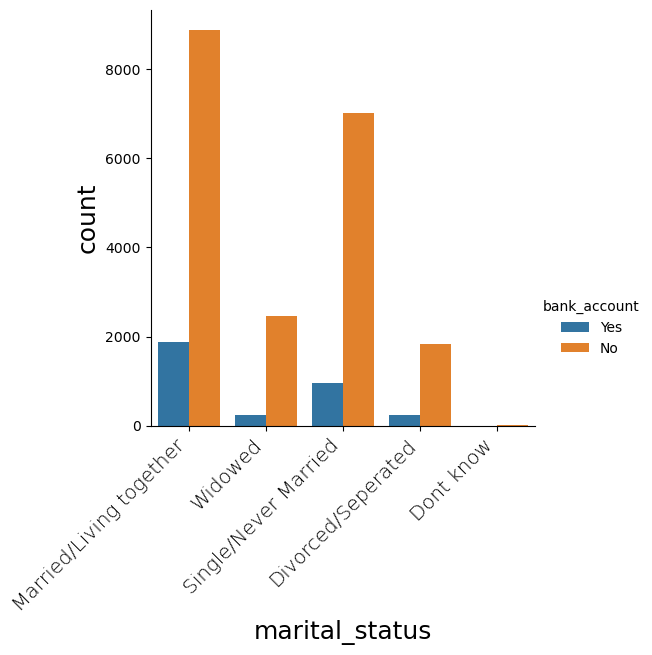

In [31]:
plt.figure(figsize=(16, 6))
sns.catplot(x='marital_status', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

<Figure size 1600x600 with 0 Axes>

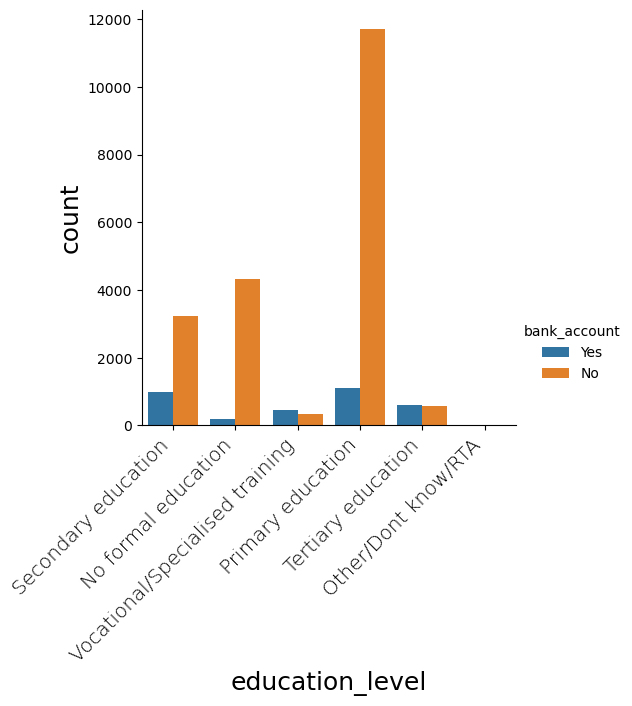

In [32]:
plt.figure(figsize=(16, 6))
sns.catplot(x='education_level', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

<Figure size 1600x600 with 0 Axes>

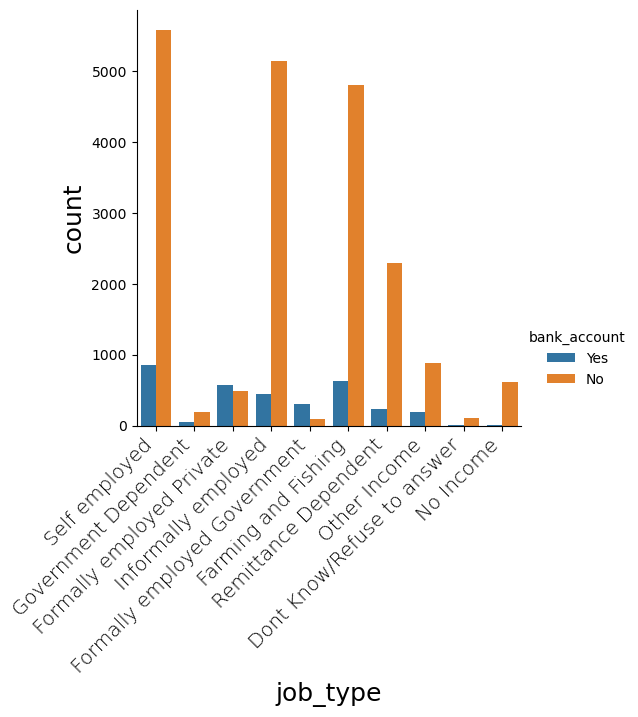

In [33]:
plt.figure(figsize=(16, 6))
sns.catplot(x='job_type', hue='bank_account', kind='count', data=train)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

In [44]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
# X_train = train.drop(['year', 'house_hold', 'marital_status'])
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


# **Our Hypothesis Results**

People who have mobile phone have lower chance to use bank account because of mobile money services.-TRUE

People who are employed have a higher chance of having a bank account than People who are unemployed. -TRUE

people with low education have low chance to have bank account - TRUE

people in rural areas have low chance to have bank account -TRUE

people who have age below 18 have low chance to have bank account-TRUE

female have less chance to have bank account -TRUE

# **DATA PREPROCESSING**

When using scaling methods like MinMaxScaler or StandardScaler, it’s generally a good practice to work with floating-point numbers:

Precision: Scaling operations require precision that is naturally handled by floating-point arithmetic. Integer operations might lead to rounding issues or loss of precision.

Library Expectations: Some libraries expect numerical inputs in float format to avoid type-related issues.

In [45]:
# function to preprocess our data from train models
def preprocessing_data(data):
    

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent",
                        "year"]].values.astype(float)

    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head", "marital_status",
             "education_level", "job_type", "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [46]:
# preprocess the train data
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [47]:
# view the first row of the processed_train dataset after preprocessing.
#Inclusive of Start, Exclusive of End
print(processed_train[:2])

[[1.         0.         1.         0.1        0.0952381  0.
  0.         0.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.2        0.64285714 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]]


In [48]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


In [49]:
import sklearn.model_selection

In [50]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(
    processed_train, y_train,
    stratify = y_train,
    test_size =28,
    random_state=42)

In [51]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix,
accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

accuracy_score = accuracy_score(y_val, xg_y_model)
print('Accuracy is = ', accuracy_score)

# Get error rate
print("Error rate of XGB classifier: ",
      1 - accuracy_score)

Error rate of XGB classifier:  0.0714285714285714


In [53]:
#print the classification report
from sklearn.metrics import classification_report

report = classification_report(y_val, xg_y_model)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.50      0.67         4

    accuracy                           0.93        28
   macro avg       0.96      0.75      0.81        28
weighted avg       0.93      0.93      0.92        28



Error rate for XGBClassifie model is:  0.0714285714285714
Confusion Matrix:
[[1.  0. ]
 [0.5 0.5]]


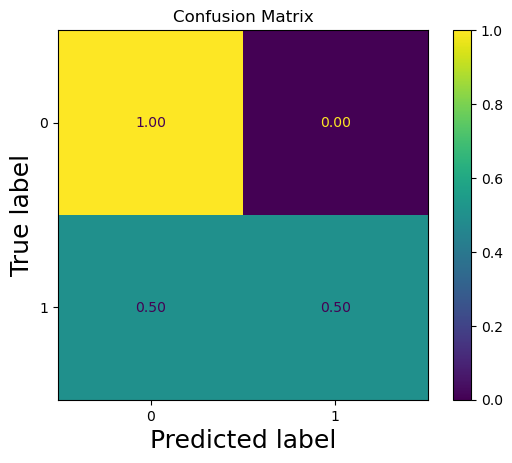

In [54]:

# calculate the accuracy and prediction of the model
from sklearn.metrics import accuracy_score, confusion_matrix,
ConfusionMatrixDisplay

xgboost_model_predicted = xg_model.predict(X_Val)
score = accuracy_score(y_val, xgboost_model_predicted)
print("Error rate for XGBClassifie model is: ", 1- score)
# Calculate confusion matrix
cm = confusion_matrix(y_val, xgboost_model_predicted,
                      normalize='true')
print("Confusion Matrix:")
print(cm)
# Plot confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=np.unique(y_val))
disp.plot(cmap='viridis', values_format='.2f')
plt.title("Confusion Matrix")
plt.show()



In [55]:
# Get the predicted result for the test Data
test.bank_account = xg_model.predict(processed_test)

In [56]:
# Create submission DataFrame
submission = pd.DataFrame({
    "uniqueid": test["uniqueid"] + " x " + test["country"],
    "bank_account": test.bank_account
    })

In [58]:
#show the five sample
submission.sample(15)

,uniqueid,bank_account
1191,uniqueid_7260 x Kenya,0
5998,uniqueid_12133 x Rwanda,1
7019,uniqueid_7294 x Tanzania,0
9768,uniqueid_2685 x Uganda,0
1039,uniqueid_7108 x Kenya,0
1923,uniqueid_7992 x Kenya,1
7262,uniqueid_7537 x Tanzania,0
1012,uniqueid_7081 x Kenya,0
8803,uniqueid_9078 x Tanzania,0
3681,uniqueid_9816 x Rwanda,1


In [60]:
# # Create submission csv file csv file
# from google.colab import files
# submission.to_csv('submission1.csv', index = False)
# files.download('submission1.csv')

In [62]:
#Create a Submission file in Jupyter notebook and download it for submission
from IPython.display import FileLink
submission.to_csv('submission1.csv', index=False)

In [63]:
#Dispaly a download link
FileLink('submission1.csv')

F:\DATA SCIENCE SKILLS TECHNOLOGY\FIELD PPT 2024- AI, ML\submission1.csv

In [66]:
#in case of excel file
from IPython.display import FileLink
submission.to_excel('submission2.xlsx', index=False)

In [67]:
#Dispaly a download link
FileLink('submission2.xlsx')

F:\DATA SCIENCE SKILLS TECHNOLOGY\FIELD PPT 2024- AI, ML\submission2.xlsx